# MODELIZACIÓN EAD - REGRESION

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = r'C:\Users\mcent\OneDrive\Escritorio\PROYECTOS ML\SCORING_DE_RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre_fichero = 'df_ead'

Cargar los datos.

In [4]:
df_ead = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero)

In [5]:
target = 'ead'

In [6]:
y_ead = df_ead[target]
x_ead = df_ead.drop(columns=target)

## MODELIZAR

### Reservar el dataset de validacion

In [7]:
train_x,val_x,train_y,val_y = train_test_split(x_ead,y_ead,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [8]:
pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])

grid = [{'algoritmo': [Ridge()],
         'algoritmo__alpha':list(np.arange(0.1,1.1,0.1))},
       
        {'algoritmo': [HistGradientBoostingRegressor()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [100],
         'algoritmo__scoring': ['neg_mean_absolute_percentage_error'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [9]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'neg_mean_absolute_error',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__scoring,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
153,74.09,1.22,1.45,0.04,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,20,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.23,-0.24,-0.24,0.00,1
189,50.08,3.53,0.68,0.08,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,20,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.24,-0.24,0.00,2
114,69.50,0.65,1.39,0.04,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,10,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,3
78,65.08,0.30,1.48,0.36,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,10,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,4
42,59.32,1.14,1.19,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,10,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,4.56,0.07,0.28,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.33,-0.33,-0.33,-0.33,0.00,186
154,5.14,0.04,0.31,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.33,-0.33,-0.33,-0.33,0.00,187
46,4.34,0.06,0.26,0.00,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.33,-0.33,-0.33,-0.33,0.00,188
10,4.40,0.10,0.20,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.33,-0.33,-0.33,-0.33,0.00,189


In [10]:
modelo_ead = HistGradientBoostingRegressor(learning_rate=0.1,
                                           max_depth= 20, 
                                           max_iter=200, 
                                           l2_regularization=0.25, 
                                           min_samples_leaf=200, 
                                           scoring='neg_mean_absolute_percentage_error')

modelo_ead.fit(train_x, train_y)

HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=20,
                              max_iter=200, min_samples_leaf=200,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUAR

### Predecir sobre validación

In [11]:
pred = modelo_ead.predict(val_x)

In [12]:
pd.DataFrame(data = pred, columns = ['pred']).describe().T

,count,mean,std,min,25%,50%,75%,max
pred,37306.00,0.34,0.21,-0.09,0.16,0.31,0.47,1.08


**Los minimos los reemplazamos por 0 y máximos por 1**

In [13]:
pred = np.where(pred > 1, 1, pred)
pred = np.where(pred < 0, 0, pred)

In [14]:
pd.DataFrame(data = pred, columns = ['pred']).describe().T

,count,mean,std,min,25%,50%,75%,max
pred,37306.00,0.34,0.21,0.00,0.16,0.31,0.47,1.00


### Evaluar sobre validación

In [15]:
mean_absolute_error(val_y, pred)

0.23600812526623005

### Reporte del modelo

In [16]:
check_validacion = pd.DataFrame({'val_y':val_y, 'pred':pred})

In [17]:
check_validacion

,val_y,pred
id_cliente,,
40856669,0.00,0.30
4414741,0.00,0.11
1450081,0.00,0.03
42473684,0.30,0.24
17582850,0.00,0.13
...,...,...
75547188,0.00,0.27
77725761,0.00,0.10
68406843,0.00,0.24


In [18]:
check_validacion.corr()

,val_y,pred
val_y,1.00,0.62
pred,0.62,1.00


<AxesSubplot:ylabel='Density'>

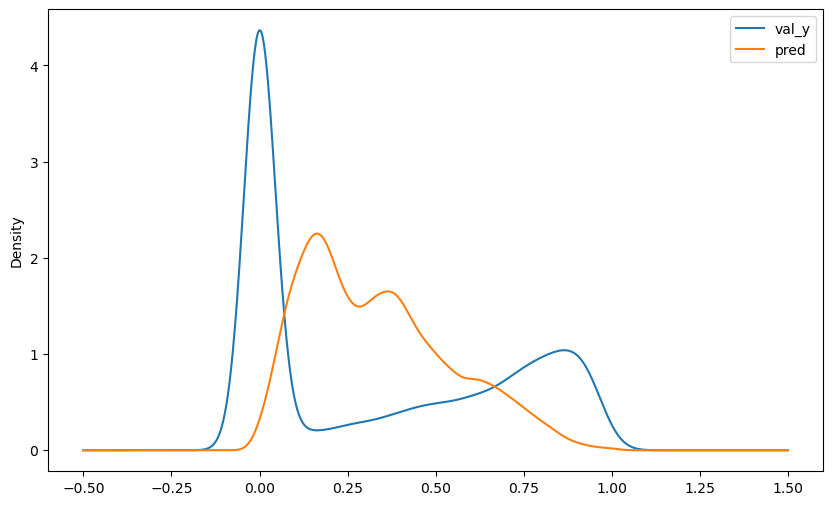

In [19]:
check_validacion.plot.density(figsize = (10,6))

**CONCLUSION**

Vemos que hay dos grupos para los datos reales, aquellos que no tendrán default y aquellos que si.
A nivel total el modelo lleva a la media, por lo que no es tan malo ya que compensaremos con aquellos que no entrarán en default porque pagarán un poco más de intereses, mientras que los de mayor riesgo pagarán menos intereses.

